## Min-Max Algorithm Codes

In [2]:
import numpy as np
from numpy import matlib
import pandas as pd

## Define Pairwise Distance Matrix
- takes in parameters: d-by-a matrix, d-by-b matrix
- returns output: distance matrix between ith column of the first matrix and the jth column of the second matrix

In [114]:
# Define the function that calculates the matrix of pairwise distances
def find_pairwise_dist(X,Y :np) -> np:
    # measure the size of matrix
    X_row = len(X)
    X_col = len(X[0])
    Y_row = len(Y)
    Y_col = len(Y[0])
    
    # check if dimension is consistent for X & Y
    if X_row != Y_row:
        print("Error. Please check the dimensions of the two matrices.")
    else:
        # squared norm for each column vector in X & Y
        X_norm2 = np.sum(X**2, axis=0)
        Y_norm2 = np.sum(Y**2, axis=0)

        # calculate distance matrix between ith vector in X and jth vector in Y
        X_norm2_b = np.matlib.repmat(X_norm2.reshape(X_col,1), 1, Y_col)
        Y_norm2_a = np.matlib.repmat(Y_norm2, X_col, 1)
        dist2_XY = X_norm2_b + Y_norm2_a - 2*np.matmul(np.transpose(X), Y)
        dist_XY = np.sqrt(np.maximum(0,dist2_XY))
        return dist_XY

#### Finding next landmark point

In [8]:
# a landmark point is selected by the largest distance away from the given seed index vector
#testX = np.array([2,1,0,1,1])
#testX.argmax() >> selects the index with the greatest number

In [127]:
def find_next_landmark(X:np, seed:int) -> int:
    seed_vector = X[:,seed].reshape((-1, 1)) # selects the seed index column and turns into a column vector
    X_col = len(X[0]) # number of given data points
    #A = np.empty(shape=[0, X_col]) #creates an empty distance matrix 
    
    newrow = find_pairwise_dist(seed_vector, X) 
    newseed = newrow.argmax() #selects the first index for the largest number in the array (if there are repeated largest numbers)
    #A = np.vstack([A, newrow])

    return newseed, newrow

# # for next step,,
# def calculate_landmarks(X, n, s):
#     newseed = s
#     result = []
#     for count in range(n):
#         (newseed, A) = find_next_landmark(X, newseed)
#         print(A, newseed)
#     return result

# calculate_landmarks(X_matrix, 5, 1)

## Define landmark functions:
#### INPUT (parameters)
- X is a d-by-a matrix with the datapoints
- s is the user-given seed index

#### OUTPUT (returns)
- index of the next landmark, pairwise distance between the next landmark and the rest of the data points


In [152]:
# parameters: X, seed, n
    # X: d-by-a matrix 
    # seed: index number
    # n: number of landmarks requested

# returns: L, DL 
    # L: landmarks (a list of length n)
    # DL: distance matrix from landmarks to data (n-by-a matrix)

def find_landmarks(X, seed, n):
    '''finds landmark points by maxmin algorithm'''
    # implicit parameter: number of data points
    a = len(X[0])

    # create a list of landmark and put seed (our zero-th landmark)
    L = [seed]

    # store the pairwise distance between the zero-th landmark and the rest of the points
    DL = np.zeros((n,a)) 
    seed_vector = X[:,seed].reshape((-1, 1)) #makes it into a column vector
    DLseed = find_pairwise_dist(seed_vector, X)
    DL[0,:] = DLseed

    # storing row of distances to the closest landmark
    DLmin = DLseed.copy()

    for count in range(1,n):

        # find new landmark and update list
        newlandmark = DLmin.argmax()
        L.append(newlandmark)

        # store the pairwise distance between the new landmark and the rest of the points
        newlandmark_vector = X[:,newlandmark].reshape((-1,1))
        newlandmarkrow = find_pairwise_dist(newlandmark_vector,X)
        DL[count,:] = newlandmarkrow

        # update row of distances to the closet landmark
        DLmin = np.minimum(DLmin, newlandmarkrow)

    return L, DL

#### TRIAL RUN

In [9]:
X_matrix = np.random.randn(2,150)

# INPUT PARAMETERS
#X is a d-by-a matrix with the datapoints
#n is the number of landmarks requested
# s is the seed index 'a single number'  s<len(X[0])

In [193]:
(L, DL) = find_landmarks(X_matrix, 10, 30)

#### Plotting original data points and landmark points

NameError: name 'L' is not defined

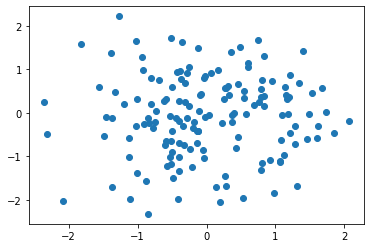

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X_matrix[0], X_matrix[1])
plt.scatter(X_matrix[0][L], X_matrix[1][L])
plt.axis('equal')

In [ ]:
# Input d-by-a matrix, d-by-b matrix
X = np.random.randn(5,3)
Y = np.random.randn(5,5)

#Output a-by-b matrix
find_pairwise_dist(X,Y)

In [ ]:
a = 5
b = 4
d = 3

X = np.random.randn(d,a)
Y = np.random.randn(d,b)

In [ ]:
print(X)
print(Y)
# test1 = np.array([3.188, 1.065, 0.773])
# test2 = test1**2
# np.sqrt(np.sum(test2))

In [ ]:
np.set_printoptions(precision=3)
X_norm2 = np.sum(X**2, axis=0)
print(X_norm2)

Y_norm2 = np.sum(Y**2, axis=0)
print(Y_norm2)

In [ ]:
X_norm2_b = np.matlib.repmat(X_norm2.reshape(a,1), 1, b)
Y_norm2_a = np.matlib.repmat(Y_norm2, a, 1)

print(X_norm2_b)
print(Y_norm2_a)

In [ ]:
dist2_XY = X_norm2_b + Y_norm2_a - 2*np.matmul(np.transpose(X), Y)
dist_XY = np.sqrt(dist2_XY)
dist_XY

In [ ]:
a = 5
b = 4
d = 3

X = np.random.randn(d,a)

np.set_printoptions(precision=3)
X_norm2 = np.sum(X**2, axis=0)

X_norm2_b = np.matlib.repmat(X_norm2.reshape(a,1), 1, b)
print(X_norm2)
print(X_norm2.reshape(a,1))
print(np.transpose(X_norm2))
